In [1]:
import pandas as pd
df_bart_pred = pd.read_csv('bart_test_result1.txt', delimiter='|',header=None, names=['Sentences', 'Present', 'Code Word','Target Word'])
df_deberta_pred = pd.read_csv('deberta_test_result1.txt', delimiter='|',header=None, names=['Sentences', 'Present', 'Code Word','Target Word'])
df_actual = pd.read_csv('.././BigQuery/Files/CombinesDS_2.txt', delimiter='|')

In [2]:
df_actual = df_actual.iloc[:103]
df_actual.shape

(103, 4)

In [3]:
actual_val = df_actual['Present'].astype(str).replace({'yes': 1, 'no': 0})
predicted_val_bart = df_bart_pred['Present'].str.strip().astype(str).replace({'yes': 1, 'no': 0})
predicted_val_deberta= df_deberta_pred['Present'].str.strip().astype(str).replace({'yes': 1, 'no': 0})

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

cm= confusion_matrix(actual_val, predicted_val_bart)
print("Confusion Matrix:\n", cm)

report = classification_report(actual_val, predicted_val_bart)
print("Classification Report:\n", report)

print(f"Accuracy is {accuracy_score(actual_val, predicted_val_bart)}")
print(f"Precision is {precision_score(actual_val, predicted_val_bart)}")
print(f"Recall is {recall_score(actual_val, predicted_val_bart)}")

Confusion Matrix:
 [[28 30]
 [ 1 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.48      0.64        58
           1       0.59      0.98      0.74        45

    accuracy                           0.70       103
   macro avg       0.78      0.73      0.69       103
weighted avg       0.80      0.70      0.69       103

Accuracy is 0.6990291262135923
Precision is 0.5945945945945946
Recall is 0.9777777777777777


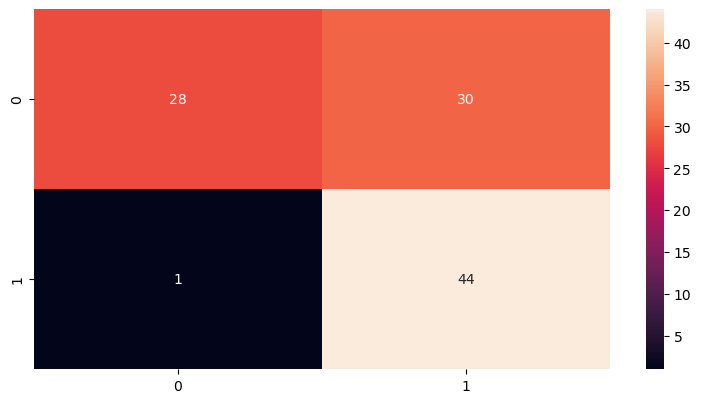

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig1=plt.figure(figsize=(8,4))
ax1=fig1.add_axes([0.1,0.1,0.9,0.9])
sns.heatmap(cm,annot=True, fmt='g')

plt.show()

In [8]:
cm= confusion_matrix(actual_val, predicted_val_deberta)
print("Confusion Matrix:\n", cm)

report = classification_report(actual_val, predicted_val_deberta)
print("Classification Report:\n", report)

print(f"Accuracy is {accuracy_score(actual_val, predicted_val_deberta)}")

Confusion Matrix:
 [[12 46]
 [ 0 45]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.21      0.34        58
           1       0.49      1.00      0.66        45

    accuracy                           0.55       103
   macro avg       0.75      0.60      0.50       103
weighted avg       0.78      0.55      0.48       103

Accuracy is 0.5533980582524272


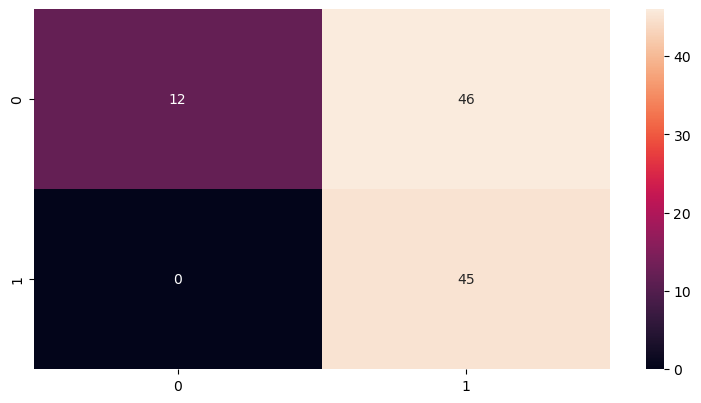

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig1=plt.figure(figsize=(8,4))
ax1=fig1.add_axes([0.1,0.1,0.9,0.9])
sns.heatmap(cm,annot=True, fmt='g')

plt.show()

In [13]:
df_bart_pred2 = df_bart_pred
df_bart_pred2 = df_bart_pred2.rename(columns={'Present': 'Pred_bard_Present', 'Code Word': 'Pred_bard_Code_Word','Target Word':'Pred_bard_target_word'})
df_bart_pred2.head()

,Sentences,Pred_bard_Present,Pred_bard_Code_Word,Pred_bard_target_word
0,"all up my nose already haha, was a very very f...",yes,NA,NA
1,nah he extended his 'christmas' sale because h...,yes,NA,NA
2,boy you really saved us all with one. almost w...,yes,NA,NA
3,ask yourself if you would eat another apple,no,NA,NA
4,the consistency was very similar to baby powde...,yes,NA,NA


In [14]:
df_deberta_pred2 = df_deberta_pred
df_deberta_pred2 = df_deberta_pred2.rename(columns={'Present': 'Pred_deberta_Present', 'Code Word': 'Pred_deberta_Code_Word','Target Word':'Pred_deberta_target_word'})
df_deberta_pred2.head()

,Sentences,Pred_deberta_Present,Pred_deberta_Code_Word,Pred_deberta_target_word
0,"all up my nose already haha, was a very very ...",yes,NA,NA
1,nah he extended his 'christmas' sale because h...,yes,NA,NA
2,boy you really saved us all with one. almost w...,yes,NA,NA
3,ask yourself if you would eat another apple,no,NA,NA
4,the consistency was very similar to baby powde...,yes,NA,NA


In [15]:
df_bart_pred2['Sentences'] = df_bart_pred2['Sentences'].str.strip()
df_deberta_pred2['Sentences'] = df_deberta_pred2['Sentences'].str.strip()
df_actual['Sentences'] = df_actual['Sentences'].str.strip()

In [17]:
matching = df_deberta_pred2['Sentences'].equals(df_actual['Sentences'])
if matching:
    print("Column A in both DataFrames is matching")
else:
    print("Column A in both DataFrames is NOT matching")

Column A in both DataFrames is matching


In [19]:
combined = pd.merge(pd.merge(df_actual, df_bart_pred2, on='Sentences'), df_deberta_pred2, on='Sentences')


In [20]:
combined.head()
combined.to_csv('Result_file_bart_deberta1.txt', sep='|',index=False)